In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Become familiar with the dataset
### The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

## Generate Descriptive Statistics and Visualizations
### Question 1: For the 'Median value of owner-occupied homes' provide a boxplot


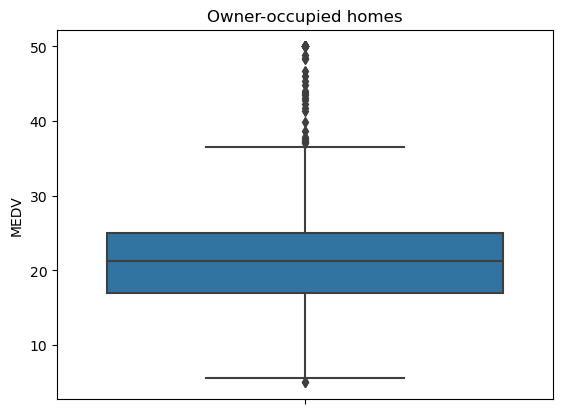

In [3]:
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title('Owner-occupied homes')
plt.show()

The boxplot above shows the median value for the variable MEDV among with outliers

### Question 2: Provide a histogram for the Charles River variable

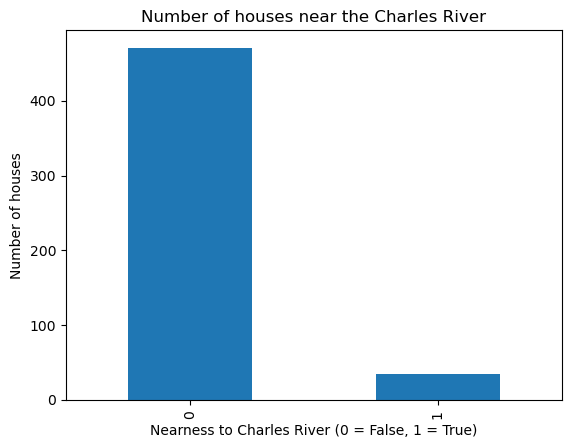

In [4]:
boston = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, delimiter=r"\s+")
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Select the 'CHAS' column
chas = boston['CHAS']

# Count the number of occurrences of each value
counts = chas.value_counts()

# Create a bar plot using Matplotlib
counts.plot(kind='bar')

# Add appropriate labels and a title to the plot
plt.title('Number of houses near the Charles River')
plt.xlabel('Nearness to Charles River (0 = False, 1 = True)')
plt.ylabel('Number of houses')

# Display the plot
plt.show()

The histogram shows that the majority of the houses are not near the Charles River

### Question 3: Provide a boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older

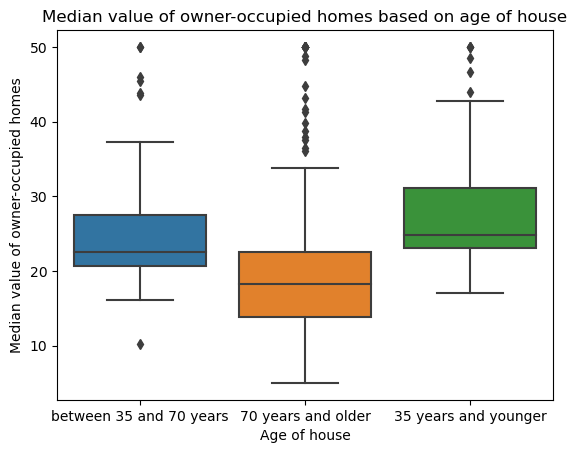

In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)

# Add appropriate labels and a title to the plot
plt.title('Median value of owner-occupied homes based on age of house')
plt.xlabel('Age of house')
plt.ylabel('Median value of owner-occupied homes')

# Display the plot
plt.show()

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

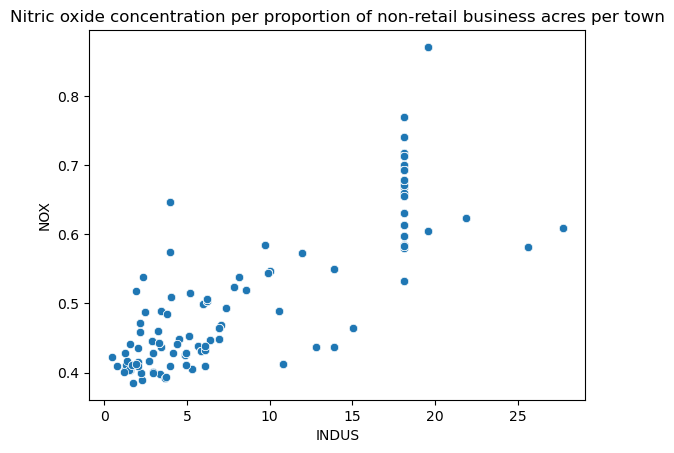

In [9]:
ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')


Values in the bottom-left section of the scatter plot indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.

Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

### Question 5: Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

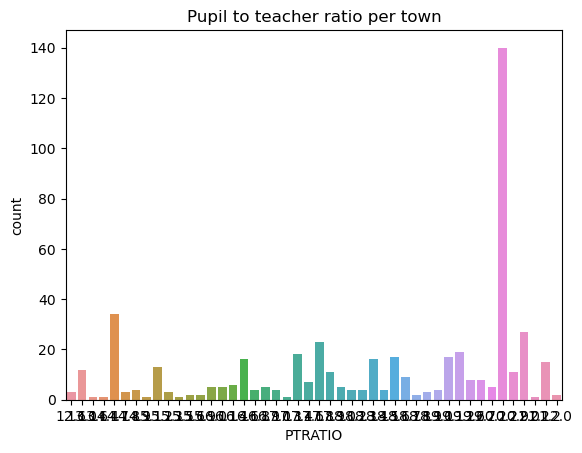

In [10]:
ax5 = sns.countplot(x = 'PTRATIO', data = boston_df)
ax5.set_title('Pupil to teacher ratio per town')

## Tests for Statistics

### Question 6: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis -> There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis -> There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [11]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

## Conclusion: 
Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bonded by Charles river.

### Question 7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis

Null Hypotesis: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [13]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [14]:
thirty_five = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_five, thirtyfive_seventy, seventy)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## Conclusion:
Since the p-value is less than alpha value 0.05, we reject the null hypothesis so there is enough proof that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

### Question 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

## Conclusion:
Since the p-value is less than alpha value 0.05, we reject the null hypothesis so there is enough proof that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Question 9: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [17]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        02:03:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion: 
The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes

